In [2]:
import pandas as pd
import numpy as np
import os

import collections
import itertools
import ast
import re

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from krwordrank.word import KRWordRank

In [3]:
from PyKomoran import *

komoran = Komoran(DEFAULT_MODEL['FULL'])

ModuleNotFoundError: No module named 'PyKomoran'

In [4]:
df = pd.read_csv('Book_title_1999to2020_in_aladin.csv')
del df['ordered']
df['writer'] = df['writer'].map(ast.literal_eval)
df.shape

(11950, 5)

In [4]:
df[(df['writer'].map(len) != 1)]['writer'].size

141

In [5]:
df['writer'] = df[~(df['writer'].map(len) != 1)]['writer'].map(lambda x: ' '.join(x[0]))

In [6]:
find_writer = re.compile(r"(.*?)\((.*?)\)")
df['split_writer'] = df[df['writer'].notna()]['writer'].map(find_writer.findall)

In [7]:
with open('user_dict.user', 'w') as dict: 
    dict.write('해커스\tNNP\n일러스트\tNNP\n리커버\tNNP\n양장판\tNNP')

In [8]:
komoran.set_user_dic("user_dict.user");

In [9]:
df['nouns'] = df['title'].map(komoran.nouns)

In [10]:
text_list = list(itertools.chain(*df['nouns'].tolist()))

In [11]:
len(text_list)

29883

In [12]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800
)
wordcloud = wordcloud.generate_from_frequencies(collections.Counter(text_list))

In [13]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(800, 800, 3)


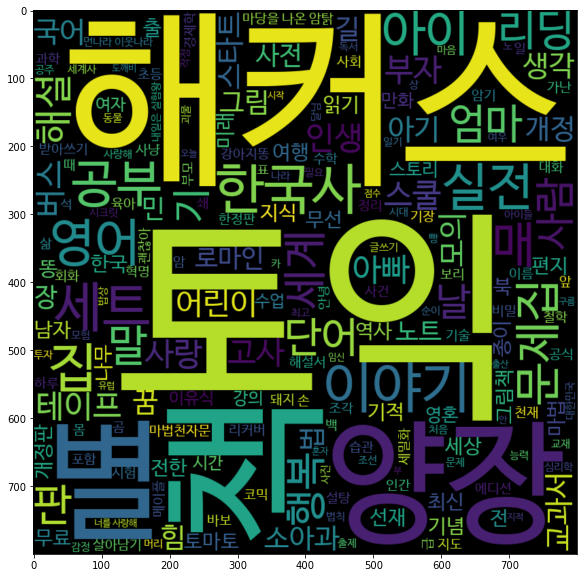

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")

In [15]:
filename = 'Book_title_1999to2020_in_aladin-processed.csv'

In [16]:
df.to_csv(filename, index = False)